In [180]:
import datacube
import xarray as xr
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import utils.dc_utilities as utilities
dc = datacube.Datacube(app = 'my_app', config = '/home/localuser/.datacube.conf') 
import dc_au_colormaps

In [284]:
import datetime
date_range =(datetime.datetime(2013,1,1), 
datetime.datetime(2014,12,31))

lon = (120.972549, 122.011577)
lat = (24.583987, 25.307047)
# 目前設為整個台北市

platform = 'LANDSAT_7' 
product = 'ls7_lasrc_taiwan'

desired_bands = ['red','green','blue','nir','swir1','swir2','pixel_qa']  

data = dc.load(product = product,platform = platform, lat = lat,lon = lon,time = date_range, measurements = desired_bands, group_by='solar_day')
data
#可能會需要一些時間來load資料

<xarray.Dataset>
Dimensions:    (latitude: 2671, longitude: 3837, time: 82)
Coordinates:
  * time       (time) datetime64[ns] 2013-01-02T02:16:59 2013-01-09T02:23:09 ...
  * latitude   (latitude) float64 25.31 25.31 25.31 25.31 25.31 25.31 25.31 ...
  * longitude  (longitude) float64 121.0 121.0 121.0 121.0 121.0 121.0 121.0 ...
Data variables:
    red        (time, latitude, longitude) int16 20000 20000 20000 20000 ...
    green      (time, latitude, longitude) int16 20000 20000 20000 20000 ...
    blue       (time, latitude, longitude) int16 20000 20000 20000 20000 ...
    nir        (time, latitude, longitude) int16 7827 7475 7333 7368 7333 ...
    swir1      (time, latitude, longitude) int16 5945 5648 5285 5483 5615 ...
    swir2      (time, latitude, longitude) int16 4627 4486 4066 4312 4558 ...
    pixel_qa   (time, latitude, longitude) int32 224 224 224 224 224 224 224 ...
Attributes:
    crs:      EPSG:4326

In [285]:
data = data.where(data >= 0).fillna(0)

In [286]:
from utils.dc_mosaic import create_median_mosaic

cfmask = xr.DataArray(np.where(data.pixel_qa.values == 66,0,1), dims = data.pixel_qa.dims, coords = data.pixel_qa.coords)
data = data.merge(cfmask.to_dataset(name = "cf_mask"))

In [287]:
clean_mask = np.reshape(np.in1d(cfmask.values.reshape(-1), [0]),
                                cfmask.values.shape)

In [288]:
combine = create_median_mosaic(data, clean_mask = clean_mask)

In [ ]:
output = (combine.pixel_qa.where(combine.pixel_qa == 66)/66).fillna(0)
output.to_netcdf('/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/urban_data/1999:2000_data_exist.nc')
#output.plot()

In [ ]:
mosaic_cfmask = combine.cf_mask
mosaic_clean_mask = np.in1d(mosaic_cfmask.values.reshape(-1), [0])

In [ ]:
combine = combine.where(combine >= 0).fillna(0)

In [ ]:
combine.to_netcdf('/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/urban_data/_2013_2014_data_all.nc')

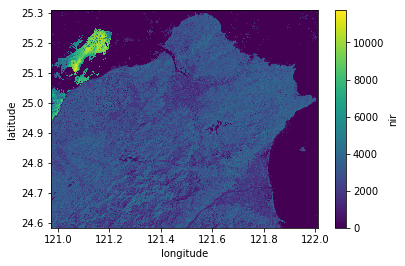

In [128]:
combine.nir.plot()

In [129]:
ndvi = ((combine.nir - combine.red) / (combine.nir + combine.red)).where(((combine.nir - combine.red) / (combine.nir + combine.red)) != float("inf")).fillna(0)

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/xarray-0.9.6-py3.5.egg/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


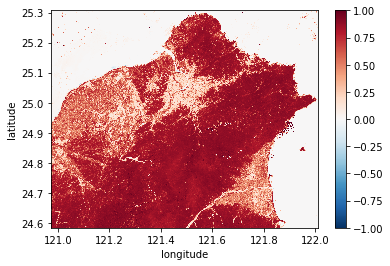

In [130]:
ndvi.plot()

In [131]:
max_val = ndvi.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (ndvi / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [132]:
plt.imsave("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2015ndvi.png", scaled)

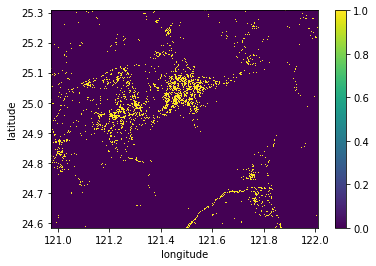

In [133]:
ndvi_01 = ndvi.values
ndvi_01 = np.where((ndvi_01 <= 0.2) & (ndvi_01 > 0.05), 1, 0)
ndvi_01 = xr.DataArray(ndvi_01, dims = ndvi.dims, coords = ndvi.coords)
ndvi_01.plot()

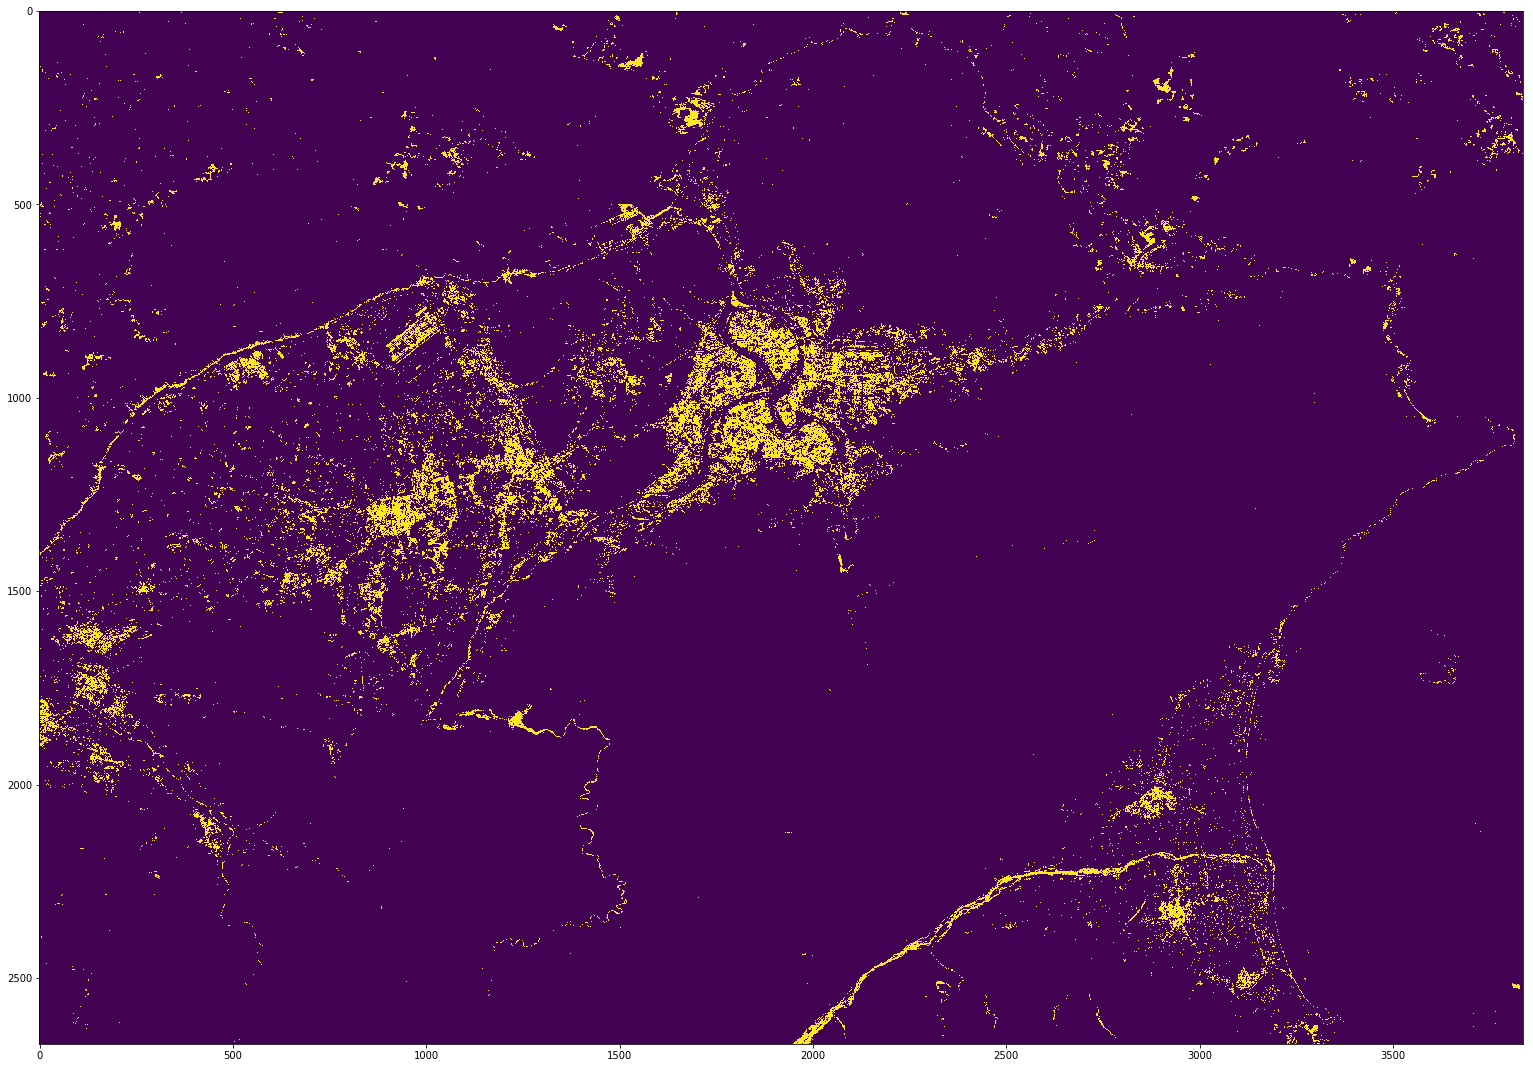

In [134]:
max_val = ndvi_01.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (ndvi_01 / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

In [135]:
plt.imsave("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2015ndvi_01.png", scaled)

In [136]:
ndbi_swir1 = ((combine.swir1 - combine.nir) / (combine.swir1 + combine.nir))

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/xarray-0.9.6-py3.5.egg/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


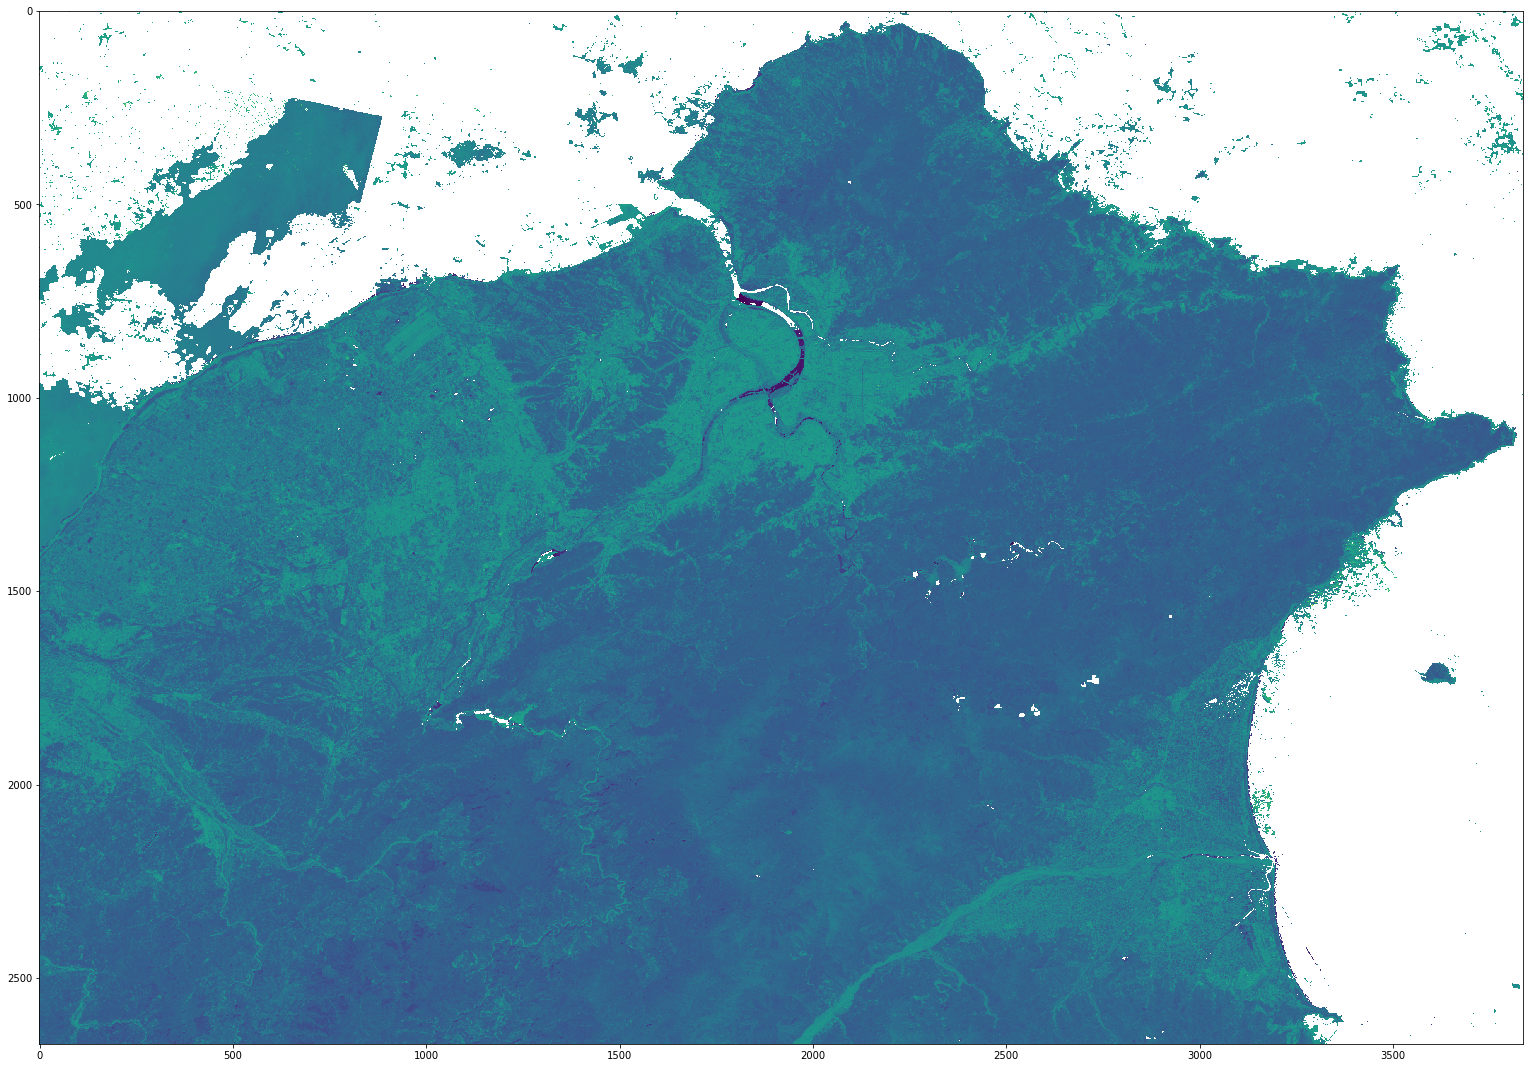

In [138]:
max_val = ndbi_swir1.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (ndbi_swir1 / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

In [139]:
plt.imsave("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2015ndbi_swir1.png", scaled)

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


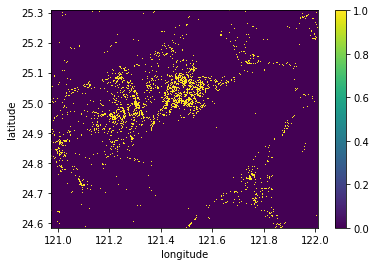

In [137]:
ndbi_swir1_01 = ndbi_swir1.values
ndbi_swir1_01 = np.where((ndbi_swir1_01 <= 0.1) & (ndbi_swir1_01 > 0), 1, 0)
ndbi_swir1_01 = xr.DataArray(ndbi_swir1_01, dims = ndbi_swir1.dims, coords = ndbi_swir1.coords)
ndbi_swir1_01.plot()

In [140]:
max_val = ndbi_swir1_01.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (ndbi_swir1_01 / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

In [141]:
plt.imsave("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2015ndbi_swir1_01.png", scaled)

In [142]:
ndbi_swir2 = ((combine.swir2 - combine.nir) / (combine.swir2 + combine.nir))

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/xarray-0.9.6-py3.5.egg/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


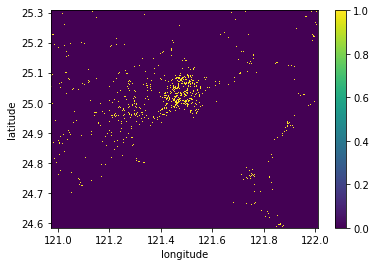

In [143]:
ndbi_swir2_01 = ndbi_swir2.values
ndbi_swir2_01 = np.where((ndbi_swir2_01 <= 0.1) & (ndbi_swir2_01 > 0), 1, 0)
ndbi_swir2_01 = xr.DataArray(ndbi_swir2_01, dims = ndbi_swir2.dims, coords = ndbi_swir2.coords)
ndbi_swir2_01.plot()

In [144]:
mndwi_swir1 = ((combine.green - combine.swir1) / (combine.green + combine.swir1))

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/xarray-0.9.6-py3.5.egg/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


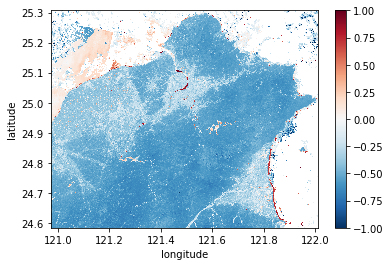

In [145]:
mndwi_swir1.plot()

In [146]:
mndwi_swir2 = ((combine.green - combine.swir2) / (combine.green + combine.swir2))

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/xarray-0.9.6-py3.5.egg/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


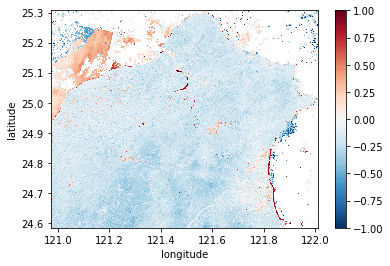

In [147]:
mndwi_swir2.plot()

In [148]:
dataset_in = data

In [136]:
cfmask = xr.DataArray(np.where(dataset_in.pixel_qa.values == 66,0,1), dims = dataset_in.pixel_qa.dims, coords = dataset_in.pixel_qa.coords)
dataset_in = dataset_in.update(cfmask.to_dataset(name = "cf_mask"))
dataset_in

<xarray.Dataset>
Dimensions:    (latitude: 2671, longitude: 3837, time: 82)
Coordinates:
  * time       (time) datetime64[ns] 2013-01-02T02:16:59 2013-01-09T02:23:09 ...
  * latitude   (latitude) float64 25.31 25.31 25.31 25.31 25.31 25.31 25.31 ...
  * longitude  (longitude) float64 121.0 121.0 121.0 121.0 121.0 121.0 121.0 ...
Data variables:
    red        (time, latitude, longitude) int16 20000 20000 20000 20000 ...
    green      (time, latitude, longitude) int16 20000 20000 20000 20000 ...
    blue       (time, latitude, longitude) int16 20000 20000 20000 20000 ...
    nir        (time, latitude, longitude) int16 7827 7475 7333 7368 7333 ...
    swir1      (time, latitude, longitude) int16 5945 5648 5285 5483 5615 ...
    swir2      (time, latitude, longitude) int16 4627 4486 4066 4312 4558 ...
    pixel_qa   (time, latitude, longitude) int32 224 224 224 224 224 224 224 ...
    cf_mask    (time, latitude, longitude) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
Attributes:
    crs:      

In [149]:
mosaic = combine

In [150]:
band_stack = []

for band in [mosaic.blue.values, mosaic.green.values, mosaic.red.values,
             mosaic.nir.values, mosaic.swir1.values, mosaic.swir2.values]:
    band = band.astype(np.float32)
    band = band * 0.0001 
    band = band.flatten()
    band_clean = np.full(band.shape, np.nan)
    band_clean[mosaic_clean_mask] = band[mosaic_clean_mask]
    band_stack.append(band_clean)
    
band_stack = np.array(band_stack).transpose()

In [151]:
for b in range(6):
    band_stack = np.hstack((band_stack, np.expand_dims(np.log(band_stack[:, b]), axis=1)))
for b in range(6):
    band_stack = np.hstack((band_stack, np.expand_dims(np.multiply(band_stack[:, b], band_stack[:, b+6]), axis=1)))
for b in range(6):
    for b2 in range(b+1, 6):
        band_stack = np.hstack((band_stack, np.expand_dims(np.multiply(band_stack[:, b], band_stack[:, b2]), axis=1))) 
for b in range(6):
    for b2 in range(b+1, 6):
        band_stack = np.hstack((band_stack, np.expand_dims(np.multiply(band_stack[:, b+6], band_stack[:, b2+6]), axis=1)))
for b in range(6):
    for b2 in range(b+1, 6):
        band_stack = np.hstack((band_stack, 
                                np.expand_dims(np.divide(band_stack[:, b2] - band_stack[:, b], 
                                                         band_stack[:, b2] + band_stack[:, b]), 
                                               axis=1)))

band_stack = np.nan_to_num(band_stack)  # Now an n x 63 matrix

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [152]:
import scipy.optimize as opt 
ones = np.ones(band_stack.shape[0])
ones = ones.reshape(ones.shape[0], 1)
band_stack = np.concatenate((band_stack, ones), axis=1) # Now an n x 64 matrix

end_members = np.loadtxt('utils/endmembers_landsat.csv', delimiter=',') # Creates a 64 x 3 matrix

SumToOneWeight = 0.02
ones = np.ones(end_members.shape[1]) * SumToOneWeight
ones = ones.reshape(1, end_members.shape[1])
end_members = np.concatenate((end_members, ones), axis=0).astype(np.float64)

result = np.zeros((band_stack.shape[0], end_members.shape[1]), dtype=np.float64) # Creates an n x 3 matrix

for i in range(band_stack.shape[0]):
    if mosaic_clean_mask[i]:
        result[i, :] = (opt.nnls(end_members, band_stack[i, :])[0].clip(0, 2.54)*100).astype(np.int16)
    else:
        result[i, :] = np.ones((end_members.shape[1]), dtype=np.int16)*(255)

result = result.reshape(mosaic.latitude.size, mosaic.longitude.size, 3)

In [153]:
import collections
pv_band = result[:, :, 0]
npv_band = result[:, :, 1]
bs_band = result[:, :, 2]

pv_clean = np.full(pv_band.shape, -9999)
npv_clean = np.full(npv_band.shape, -9999)
bs_clean = np.full(bs_band.shape, -9999)

rapp_bands = collections.OrderedDict([('bs', (['latitude', 'longitude'], bs_band)),
                                          ('pv', (['latitude', 'longitude'], pv_band)),
                                          ('npv', (['latitude', 'longitude'], npv_band))])

rapp_dataset = xr.Dataset(rapp_bands, coords=dataset_in.coords)

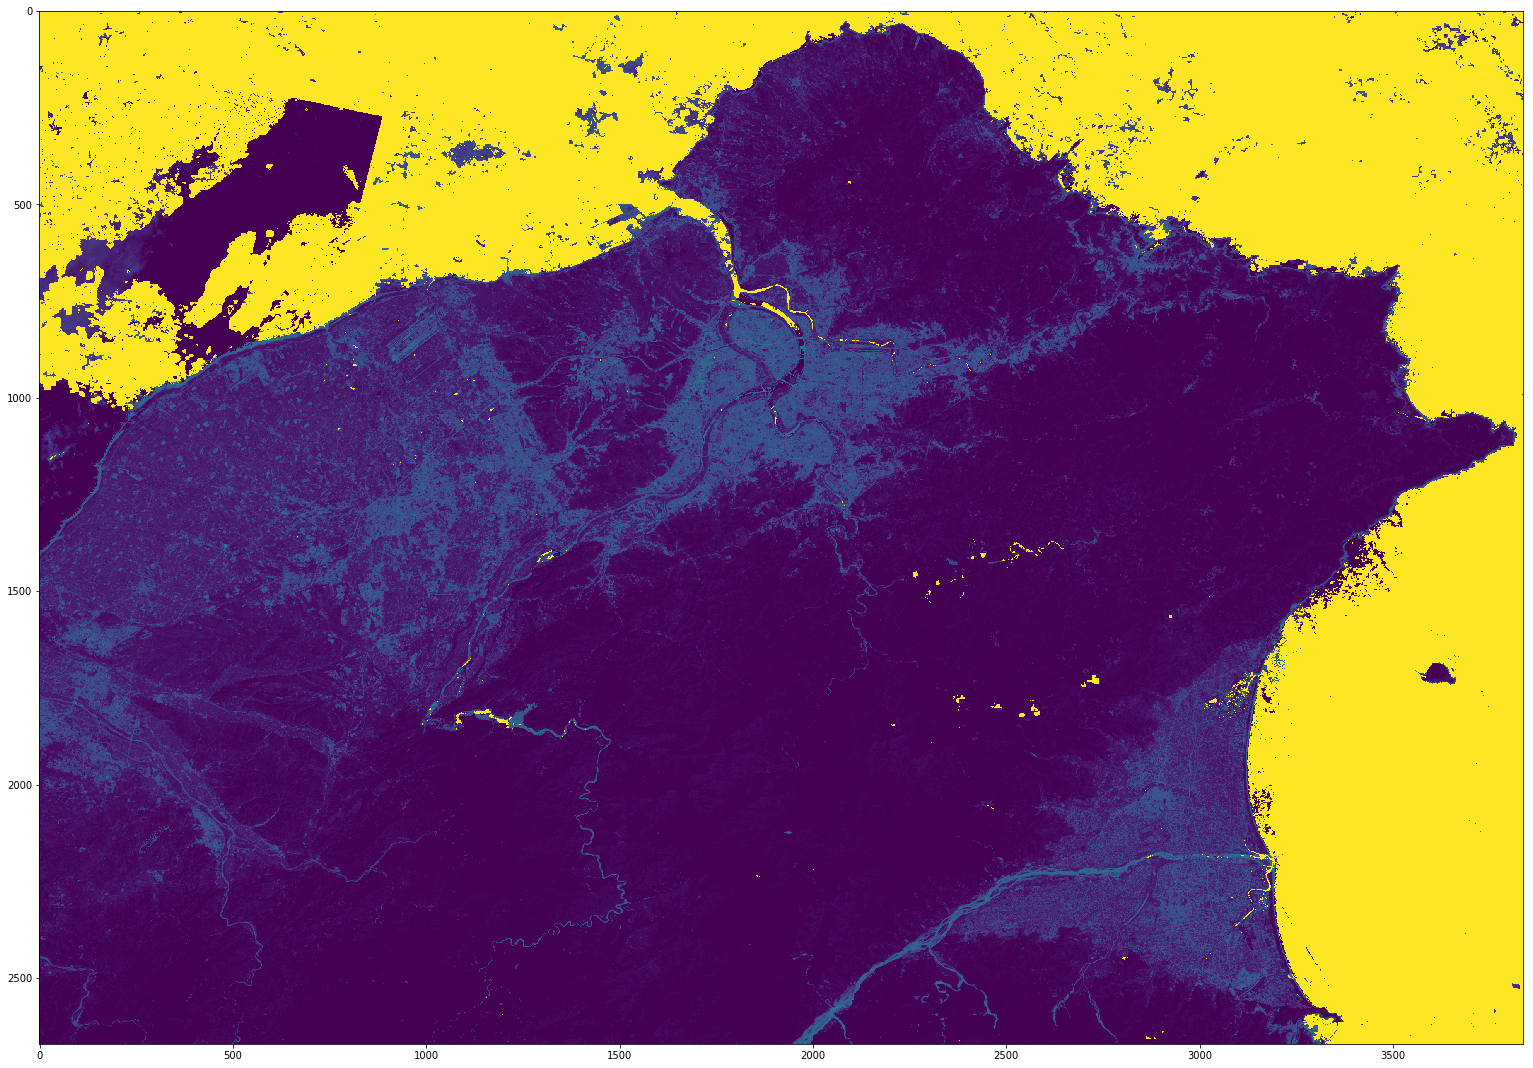

In [161]:

max_val = rapp_dataset.bs.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (rapp_dataset.bs / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

In [162]:
plt.imsave("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2015FC-bs.png", scaled)

In [154]:
FC_01 = xr.DataArray(np.where((rapp_dataset.bs.values <= 100) & (rapp_dataset.bs.values >=40),1,0), dims = rapp_dataset.bs.dims, coords = rapp_dataset.bs.coords)

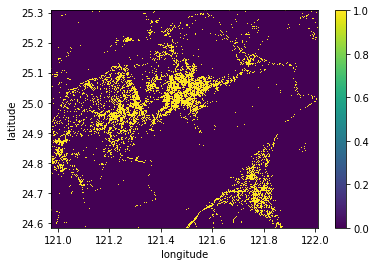

In [155]:
FC_01.plot()

In [156]:
max_val = FC_01.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (FC_01 / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

In [157]:
plt.imsave("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2015FC_01.png", scaled)

In [167]:
SUMUP = (ndvi_01.where(water_class2.wofs != 1) + ndbi_swir1_01.where(water_class2.wofs != 1) + FC_01.where(water_class2.wofs != 1)).fillna(0)

In [168]:
max_val = SUMUP.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (SUMUP / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

In [169]:
plt.imsave("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2015-urbanization_withoutwater.png", scaled)

In [164]:
import gc
import numpy as np
import xarray as xr

import datacube
import utils.dc_utilities as utilities

# Command line tool imports
import argparse
import os
import collections
import gdal
from datetime import datetime

# Author: KMF
# Creation date: 2016-06-13

def wofs_classify2(dataset_in, clean_mask=None, no_data=-9999, enforce_float64=False):
    """
    Description:
      Performs WOfS algorithm on given dataset. If no clean mask is given, the 'cf_mask'
      variable must be included in the input dataset, as it will be used to create a
      clean mask
    Assumption:
      - The WOfS algorithm is defined for Landsat 5/Landsat 7
    References:
      - Mueller, et al. (2015) "Water observations from space: Mapping surface water from
        25 years of Landsat imagery across Australia." Remote Sensing of Environment.
      - https://github.com/GeoscienceAustralia/eo-tools/blob/stable/eotools/water_classifier.py
    -----
    Inputs:
      dataset_in (xarray.Dataset) - dataset retrieved from the Data Cube; should contain
        coordinates: time, latitude, longitude
        variables: blue, green, red, nir, swir1, swir2
        If user does not provide a clean_mask, dataset_in must also include the cf_mask
        variable
    Optional Inputs:
      clean_mask (nd numpy array with dtype boolean) - true for values user considers clean;
        if user does not provide a clean mask, one will be created using cfmask
      no_data (int/float) - no data pixel value; default: -9999
      enforce_float64 (boolean) - flag to indicate whether or not to enforce float64 calculations;
        will use float32 if false
    Output:
      dataset_out (xarray.DataArray) - wofs water classification results: 0 - not water; 1 - water
    """

    def _band_ratio(a, b):
        """
        Calculates a normalized ratio index
        """
        return (a - b) / (a + b)

    def _run_regression(band1, band2, band3, band4, band5, band7):
        """
        Regression analysis based on Australia's training data
        TODO: Return type
        """

        # Compute normalized ratio indices
        ndi_52 = _band_ratio(band5, band2)
        ndi_43 = _band_ratio(band4, band3)
        ndi_72 = _band_ratio(band7, band2)

        #classified = np.ones(shape, dtype='uint8')

        classified = np.full(shape, no_data)

        # Start with the tree's left branch, finishing nodes as needed

        # Left branch
        r1 = ndi_52 <= -0.01

        r2 = band1 <= 2083.5
        classified[r1 & ~r2] = 0 #Node 3

        r3 = band7 <= 323.5
        _tmp = r1 & r2
        _tmp2 = _tmp & r3
        _tmp &= ~r3

        r4 = ndi_43 <= 0.61
        classified[_tmp2 & r4] = 1 #Node 6
        classified[_tmp2 & ~r4] = 0 #Node 7

        r5 = band1 <= 1400.5
        _tmp2 = _tmp & ~r5

        r6 = ndi_43 <= -0.01
        classified[_tmp2 & r6] = 1 #Node 10
        classified[_tmp2 & ~r6] = 0 #Node 11

        _tmp &= r5

        r7 = ndi_72 <= -0.23
        _tmp2 = _tmp & ~r7

        r8 = band1 <= 379
        classified[_tmp2 & r8] = 1 #Node 14
        classified[_tmp2 & ~r8] = 0 #Node 15

        _tmp &= r7

        r9 = ndi_43 <= 0.22
        classified[_tmp & r9] = 1 #Node 17
        _tmp &= ~r9

        r10 = band1 <= 473
        classified[_tmp & r10] = 1 #Node 19
        classified[_tmp & ~r10] = 0 #Node 20

        # Left branch complete; cleanup
        del r2, r3, r4, r5, r6, r7, r8, r9, r10
        gc.collect()

        # Right branch of regression tree
        r1 = ~r1

        r11 = ndi_52 <= 0.23
        _tmp = r1 & r11

        r12 = band1 <= 334.5
        _tmp2 = _tmp & ~r12
        classified[_tmp2] = 0 #Node 23

        _tmp &= r12

        r13 = ndi_43 <= 0.54
        _tmp2 = _tmp & ~r13
        classified[_tmp2] = 0 #Node 25

        _tmp &= r13

        r14 = ndi_52 <= 0.12
        _tmp2 = _tmp & r14
        classified[_tmp2] = 1 #Node 27

        _tmp &= ~r14

        r15 = band3 <= 364.5
        _tmp2 = _tmp & r15

        r16 = band1 <= 129.5
        classified[_tmp2 & r16] = 1 #Node 31
        classified[_tmp2 & ~r16] = 0 #Node 32

        _tmp &= ~r15

        r17 = band1 <= 300.5
        _tmp2 = _tmp & ~r17
        _tmp &= r17
        classified[_tmp] = 1 #Node 33
        classified[_tmp2] = 0 #Node 34

        _tmp = r1 & ~r11

        r18 = ndi_52 <= 0.34
        classified[_tmp & ~r18] = 0 #Node 36
        _tmp &= r18

        r19 = band1 <= 249.5
        classified[_tmp & ~r19] = 0 #Node 38
        _tmp &= r19

        r20 = ndi_43 <= 0.45
        classified[_tmp & ~r20] = 0 #Node 40
        _tmp &= r20

        r21 = band3 <= 364.5
        classified[_tmp & ~r21] = 0 #Node 42
        _tmp &= r21

        r22 = band1 <= 129.5
        classified[_tmp & r22] = 1 #Node 44
        classified[_tmp & ~r22] = 0 #Node 45

        # Completed regression tree

        return classified

    # Extract dataset bands needed for calculations
    blue = dataset_in.blue
    green = dataset_in.green
    red = dataset_in.red
    nir = dataset_in.nir
    swir1 = dataset_in.swir1
    swir2 = dataset_in.swir2

    # Create a clean mask from cfmask if the user does not provide one
        #cfmask = dataset_in.cf_mask
        #clean_mask = utilities.create_cfmask_clean_mask(cfmask)

    # Enforce float calculations - float64 if user specified, otherwise float32 will do
    dtype = blue.values.dtype

    if enforce_float64:
        if dtype != 'float64':
            blue.values = blue.values.astype('float64')
            green.values = green.values.astype('float64')
            red.values = red.values.astype('float64')
            nir.values = nir.values.astype('float64')
            swir1.values = swir1.values.astype('float64')
            swir2.values = swir2.values.astype('float64')
    else:
        if dtype == 'float64':
            pass
        elif dtype != 'float32':
            blue.values = blue.values.astype('float32')
            green.values = green.values.astype('float32')
            red.values = red.values.astype('float32')
            nir.values = nir.values.astype('float32')
            swir1.values = swir1.values.astype('float32')
            swir2.values = swir2.values.astype('float32')

    shape = blue.values.shape
    classified = _run_regression(blue.values, green.values, red.values,
                                 nir.values, swir1.values, swir2.values)

    classified_clean = np.full(classified.shape, no_data)
    #classified_clean[clean_mask] = classified[clean_mask] # Contains data for clear pixels

    # Create xarray of data

    latitude = dataset_in.latitude
    longitude = dataset_in.longitude

    data_array = xr.DataArray(classified,
                              coords=[latitude, longitude],
                              dims=['latitude', 'longitude'])

    dataset_out = xr.Dataset({'wofs': data_array},
                             coords={
                                     'latitude': latitude,
                                     'longitude': longitude})

    return dataset_out


In [165]:
water_class2 = wofs_classify2(combine)

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide
/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less_equal
/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in less_equal
/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in less_equal
/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in less_equal
/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in less_equal
/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:118: RuntimeWarning: i

In [166]:
urban_class = ndvi.where(water_class2.wofs != 1).fillna(-9999).to_dataset(name = 'ndvi')
urban_class = urban_class.merge(ndbi_swir1.where(water_class2.wofs != 1).fillna(-9999).to_dataset(name = 'ndbi_swir1'))
urban_class = urban_class.merge(rapp_dataset.bs.where(water_class2.wofs != 1).fillna(-9999).to_dataset(name = 'FC'))

In [105]:
urban_class.to_netcdf('/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/urban_data/2015_urban.nc')

In [174]:
from utils.dc_clustering import kmeans_cluster_dataset
classification_4 = kmeans_cluster_dataset(urban_class, bands=['ndvi', 'ndbi_swir1', 'FC'], n_clusters=4)

In [175]:
classification_4.classification.plot()

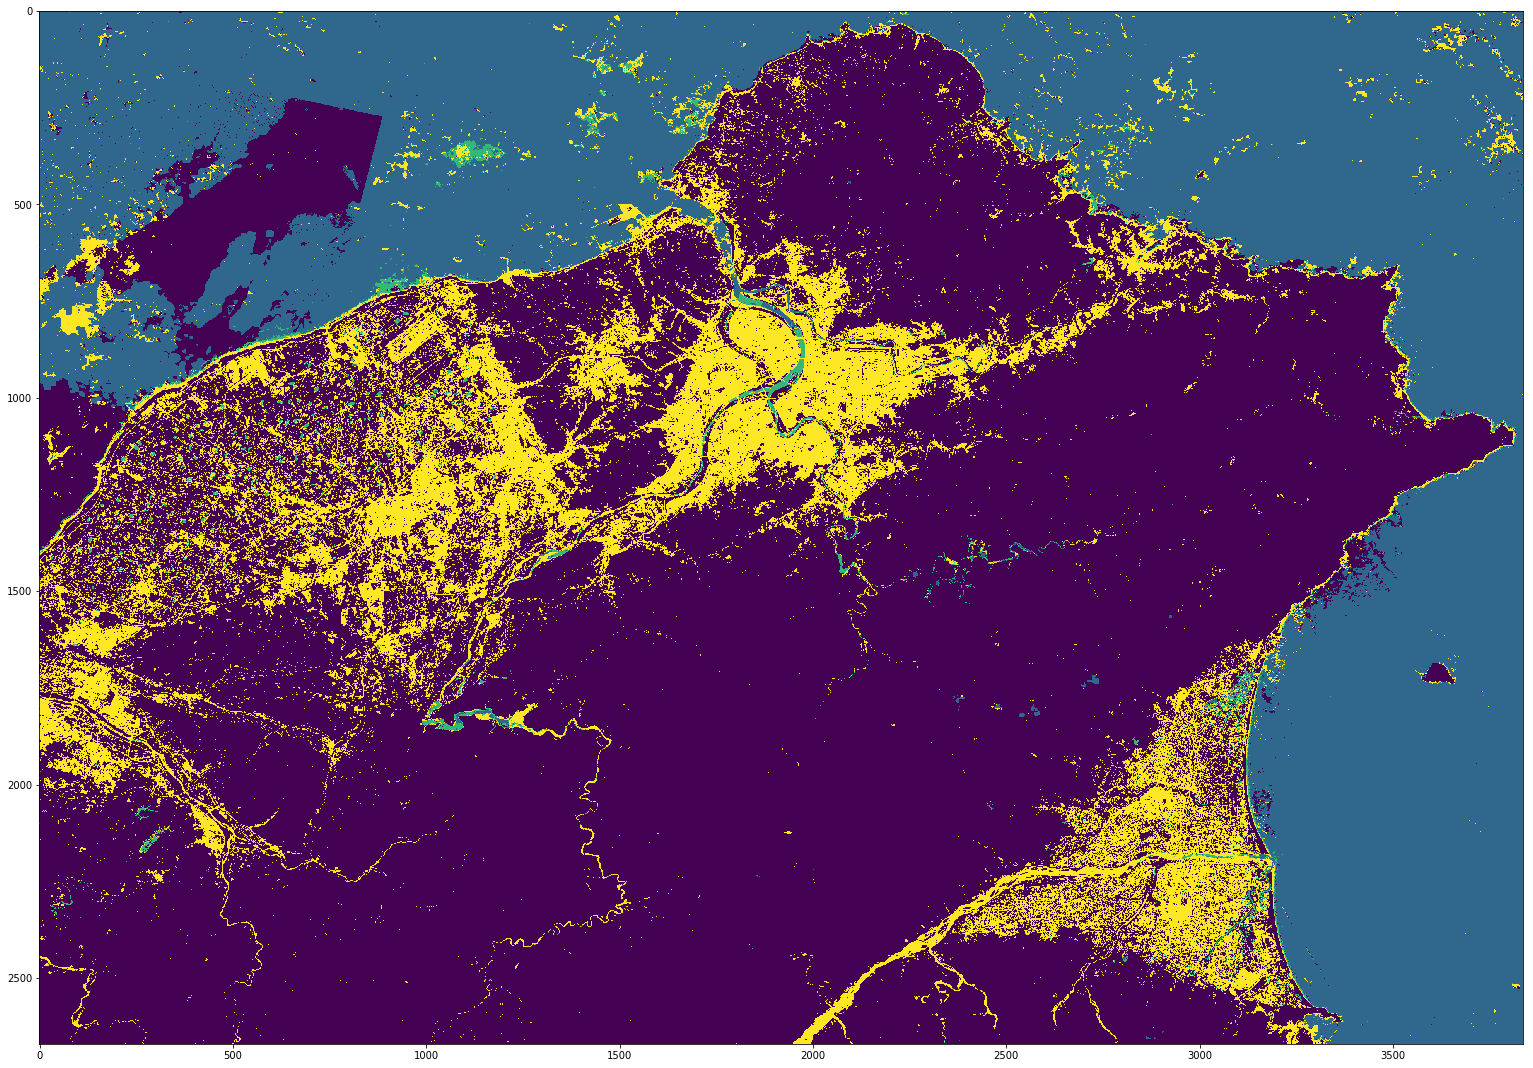

In [176]:
max_val = classification_4.classification.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (classification_4.classification / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

In [177]:
plt.imsave("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2015K-mean4_all.png", scaled)

In [178]:
max_val = classification_4.where(classification_4 == 3).fillna(0).classification.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (classification_4.where(classification_4 == 3).fillna(0).classification / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

In [179]:
plt.imsave("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2015bigger-urbanization_K-mean4_all.png", scaled)

In [109]:
from utils.dc_utilities import write_geotiff_from_xr, write_png_from_xr
write_geotiff_from_xr("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2014-2013_urban_K-mean_class.tiff", classification_4.where(classification_4 == 3).fillna(0).classification.to_dataset(name = "class"),['class'], nodata=0, crs="EPSG:4326")

In [111]:
classification_4.where(classification_4 == 2).fillna(0).classification.to_dataset(name = "class").to_netcdf('/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/urban_data/2014-2013_urban_class.nc')